In [1]:
import datetime
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# open the 'jan2020.json' file so that JSON library can parse it
# because JSON can't .read() files
with open('jan2020.json') as jan2020:
    jan2020 = jan2020.read()

# open the 'feb2020.json' file so that JSON library can parse it
# because JSON can't .read() files
with open('feb2020.json') as feb2020:
    feb2020 = feb2020.read()

with open('jan2021.json') as jan2021:
    jan2021 = jan2021.read()

with open('feb2021.json') as feb2021:
    feb2021 = feb2021.read()

# JSON library loads the data read from the 'jan2020.json' file
jan2020 = json.loads(jan2020)

# JSON library loads the data read from the 'feb2020.json' file
feb2020 = json.loads(feb2020)

# JSON library loads the data read from the 'jan2021.json' file
jan2021 = json.loads(jan2021)

# JSON library loads the data read from the 'feb2021.json' file
feb2021 = json.loads(feb2021)

In [2]:
# this is needed to convert the days of the month into timestamps
# in order to compare with the timestamps in 'jan2020/feb2020' files
days = list(range(1,32))

# this will hold the timestamps 'ds,de' (day start,day end) as tuples
# example: ts = [(1577836800.0, 1577923140.0),(1577923200.0, 1578009540.0)...]
ts1 = []
ts2 = []

for d in days:
    # create a datetime object representing the start of the day and convert to timestamp
    ds1 = datetime.datetime.timestamp(datetime.datetime(2020,1,d,0,0))
    # create a datetime object representing the end of the day and convert to timestamp
    de1 = datetime.datetime.timestamp(datetime.datetime(2020,1,d,23,59))
    # create a datetime object representing the start of the day and convert to timestamp
    ds2 = datetime.datetime.timestamp(datetime.datetime(2021,1,d,0,0))
    # create a datetime object representing the end of the day and convert to timestamp
    de2 = datetime.datetime.timestamp(datetime.datetime(2021,1,d,23,59))
    
    ts1.append((ds1,de1))
    ts2.append((ds2,de2))


In [3]:
# this will hold the temperatures of each day as a list (t = [d,d,d...])
j2020 = []

for i in ts1:
    d = []
    for item in jan2020['observations']:
        if item['valid_time_gmt']>=i[0] and item['valid_time_gmt']<=i[1]:
            d.append(item['temp'])
        else:
            pass
    # This is needed in order to prevent EMPTY 'd' lists from being added to the 't' list
    # because the last days of the month are missing
    if d==[]:
        break
    else:
        j2020.append(d)

# unfortunately next month must be searched for the last days of the previous month
# because the last days of the previous month are missing
for i in ts1[len(j2020):]:
    d = []
    for item in feb2020['observations']:
        if item['valid_time_gmt']>=i[0] and item['valid_time_gmt']<=i[1]:
            d.append(item['temp'])
        else:
            pass
    j2020.append(d)


In [4]:
# this will hold the temperatures of each day as a list (t = [d,d,d...])
j2021 = []

for i in ts2:
    d = []
    for item in jan2021['observations']:
        if item['valid_time_gmt']>=i[0] and item['valid_time_gmt']<=i[1]:
            d.append(item['temp'])
        else:
            pass
    # This is needed in order to prevent EMPTY 'd' lists from being added to the 't' list
    # because the last days of the month are missing
    if d==[]:
        break
    else:
        j2021.append(d)

# unfortunately next month must be searched for the last days of the previous month
# because the last days of the previous month are missing
for i in ts2[len(j2021):]:
    d = []
    for item in feb2021['observations']:
        if item['valid_time_gmt']>=i[0] and item['valid_time_gmt']<=i[1]:
            d.append(item['temp'])
        else:
            pass
    j2021.append(d)


In [5]:
jan = []

for d in j2020:
    jan.append({'year':2020,'day':j2020.index(d)+1,'hi':max(d),'low':min(d)})

for d in j2021:
    jan.append({'year':2021,'day':j2021.index(d)+1,'hi':max(d),'low':min(d)})


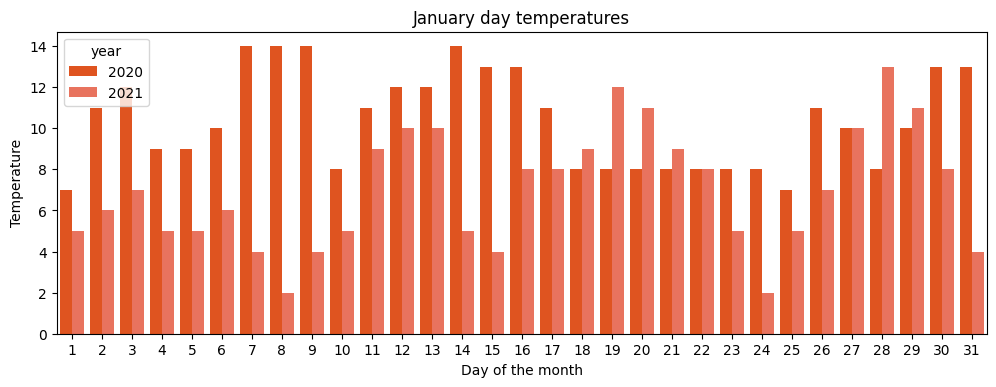

In [6]:
jan = pd.DataFrame(jan)

plt.figure(figsize=(12.0,4.0),dpi=100)
plt.title('January day temperatures')
sns.barplot(x=jan['day'],y=jan['hi'],data=jan,hue=jan['year'],palette=['#ff4500','#ff6347'])
plt.xlabel('Day of the month')
plt.ylabel('Temperature')
plt.show()